In [5]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
mode = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[128, 128, 3]),
    effnetv2_model.get_model('efficientnetv2-b0', include_top=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4, activation='softmax'),
])

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [3]:
import os
import sys
import tensorflow_addons as tfa
# SET LIBRARY DIRECTORY
LIB_DIR = "E:/oct images"

# To give access to automl files
sys.path.insert(0, LIB_DIR)
sys.path.insert(0, os.path.join(LIB_DIR, "automl-master"))
sys.path.insert(0, os.path.join(LIB_DIR, "automl-master", "efficientnetv2"))
    
# EfficientDET Module Imports
import effnetv2_configs
import preprocessing
import effnetv2_model
import hparams
import utils


D:\Dhanush\Anaconda\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [18]:
import numpy as np 
import cv2
import os
import pandas as pd

In [3]:
datadir = 'E:/oct images/OCT2017_/train'
category = ['CNV','DME','DRUSEN','NORMAL']

for cat in category:
    path = os.path.join(datadir,cat)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img))

In [12]:
print(img_arr.shape)

(496, 512, 3)


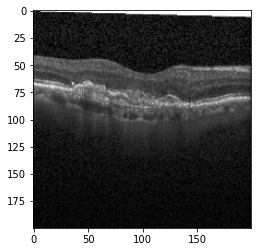

In [13]:
img_size = 200

new_arr = cv2.resize(img_arr,(img_size,img_size))
plt.imshow(new_arr)
plt.show()

In [15]:
train_data = []
file_path = []
classes = []
def create_traindata():
    for cat in category:
        path = os.path.join(datadir,cat)
        classnum = category.index(cat)
        for img in os.listdir(path):
            file_path.append(os.path.join(path,img))
            classes.append(classnum)
            train_data.append([os.path.join(path,img),classnum])
create_traindata()

In [21]:
df = pd.DataFrame({"File_Path":file_path,"Class":classes})

In [2]:
import tensorflow as tf
#from tensorflow import keras 
from tensorflow.keras.models import Sequential

#import tensorflow_datasets as tfds

#/tf.enable_eager_execution()
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
#from tensorflow.keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
#import theano

In [8]:
# # !pip install keras
# # !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu
#!pip install theano

In [5]:
path_test = 'E:/oct images/OCT2017_/train'
CATEGORIES = ['CNV','DME','DRUSEN','NORMAL']
IMG_SIZE = 200
# for cat in category:
#     path = os.path.join(datadir,cat)
#     for img in os.listdir(path):
#         img_arr = cv2.imread(os.path.join(path,img))

In [6]:
training = []
def createTrainingData():
    for category in CATEGORIES:
        path = os.path.join(path_test, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array, class_num])
createTrainingData()

In [7]:
random.shuffle(training)

In [8]:
X =[]
y =[]
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [14]:
X /= 255 
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 4) 
print(Y[100])
print(shape(Y))

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
batch_size = 16
nb_classes =4
nb_epochs = 5
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))